In [111]:
import requests, json
import pandas as pd
import numpy as np
import decimal
import time
from datetime import datetime, timedelta
from rich import print
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

api_key= os.getenv('taostats_api')

headers = {
            "accept": "application/json",
            "Authorization": api_key
        }

In [112]:
#get all SNs I am staked on in tao or alpha for the last {days}

coldkey = ""
days =1
#tao or alpha
yaxis = "alpha"




subnet_data = []
url = f"https://api.taostats.io/api/dtao/stake_balance/latest/v1?coldkey={coldkey}"
response = requests.get(url, headers=headers)
resJson = json.loads(response.text)
subnets = resJson['data']
for subnet in subnets:
    netuid = subnet['netuid']
    hotkey = subnet['hotkey']['ss58']
    subnet_data.append([netuid, hotkey])


20

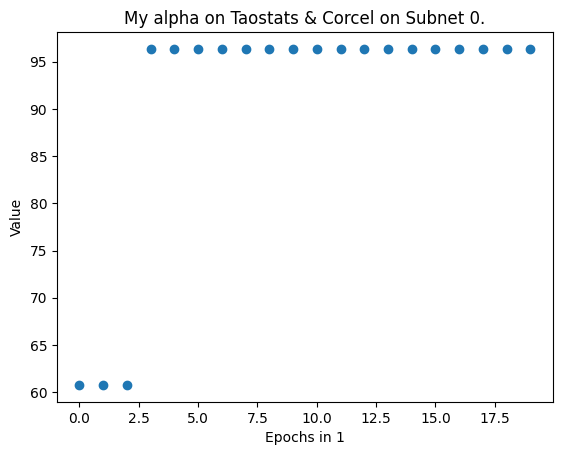

20

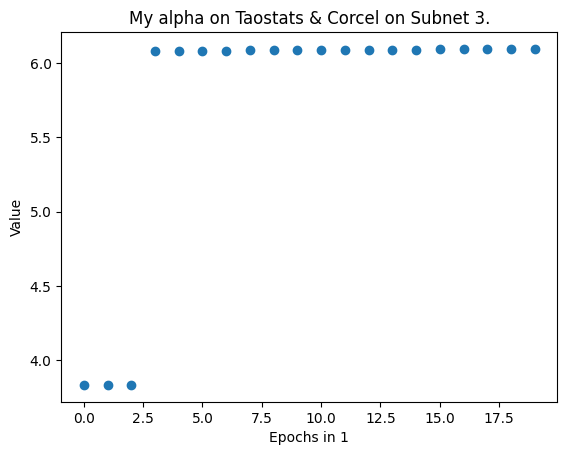

20

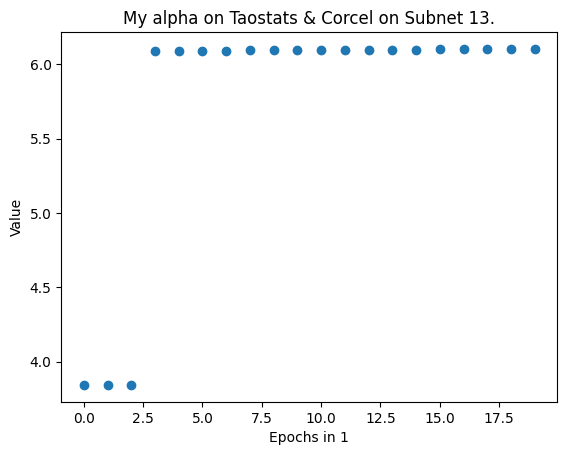

20

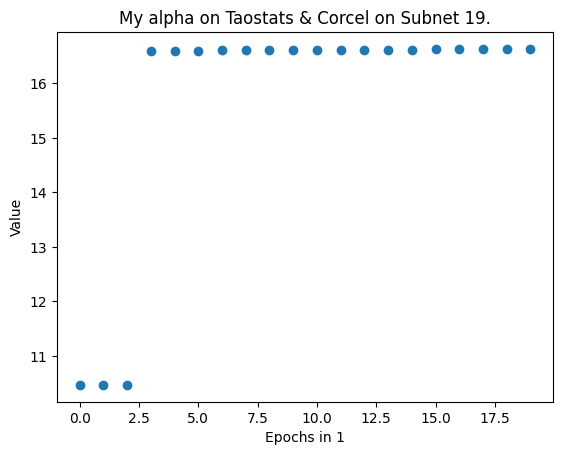

20

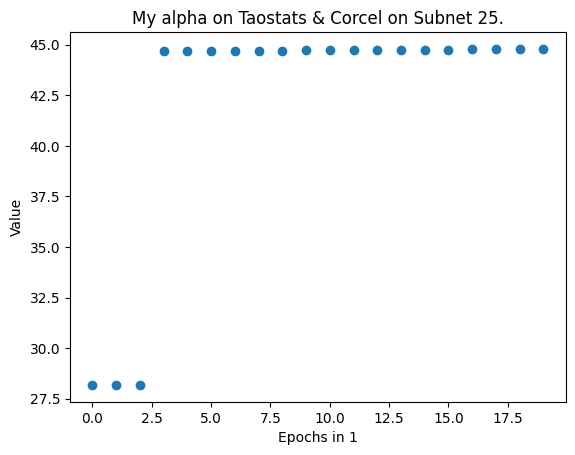

20

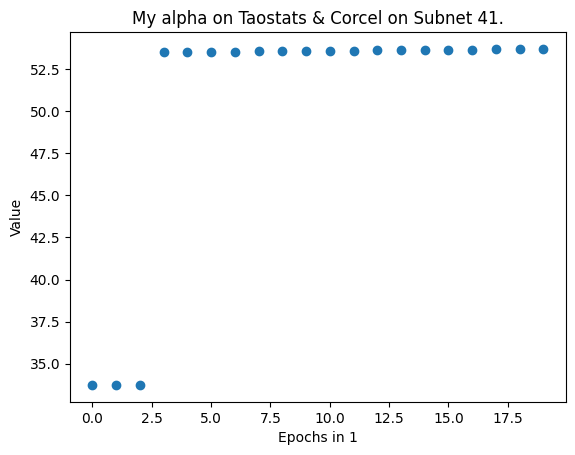

20

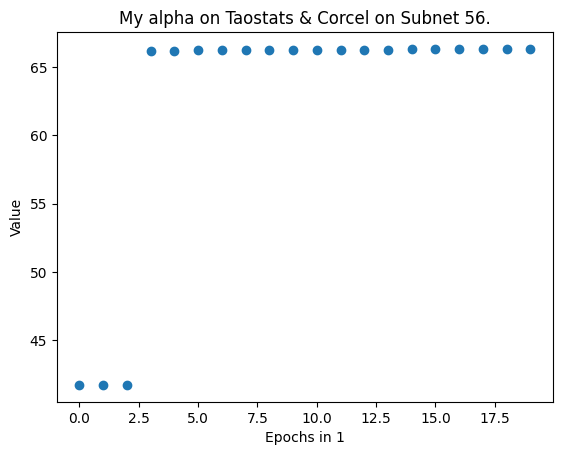

20

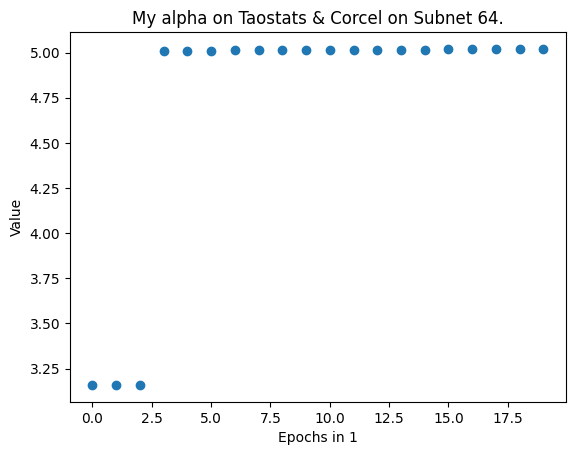

20

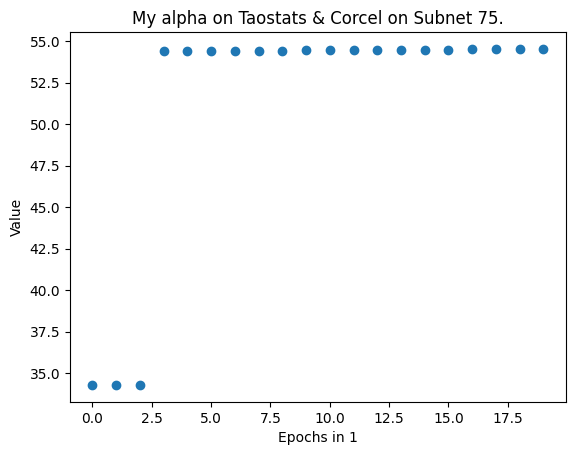

In [113]:
if yaxis == "alpha":
    returns = "balance"
else:
    returns = "balance_as_tao"


all_subnet_data = []
for subnet in subnet_data:
    netuid = subnet[0]
    hotkey = subnet[1]

    url = f"https://api.taostats.io/api/dtao/stake_balance/history/v1?hotkey={hotkey}&coldkey={coldkey}&netuid={netuid}&limit=200"
    response = requests.get(url, headers=headers)
    resJson = json.loads(response.text)
    balancedata = resJson['data']
    hotkeybalance = []
    for balance in balancedata:
        alpha = float(balance[returns])/1e9
        hotkeybalance.append(alpha)
    valiname = balance['hotkey_name']
    
    
    #reverse balance and get last x epochs
    epochs = int(days*20)
    print(epochs)
    
    hotkeybalance = hotkeybalance[::-1]
    hotkeybalance = hotkeybalance[-epochs:]
    all_subnet_data.append(hotkeybalance)
   
    # Create a scatter plot
    plt.scatter(range(len(hotkeybalance)), hotkeybalance)
    
    # Add title and labels
    plt.title(f'My alpha on {valiname} on Subnet {netuid}.')
    plt.xlabel(f'Epochs in {days}')
    plt.ylabel('Value')
    
    # Display the plot
    plt.show()

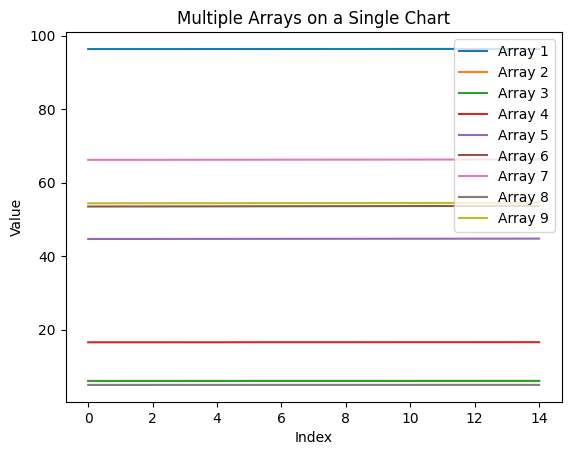

In [103]:
arrays = all_subnet_data

# Plot each array as a separate line
for i, arr in enumerate(arrays):
    plt.plot(arr, label=f'Array {i+1}')

# Add title and labels
plt.title('Multiple Arrays on a Single Chart')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()